<a href="https://colab.research.google.com/github/CodeByAbi/Cat-and-Dog-Clasification/blob/main/Cat_and_Dog_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cat and Dog Clasification**

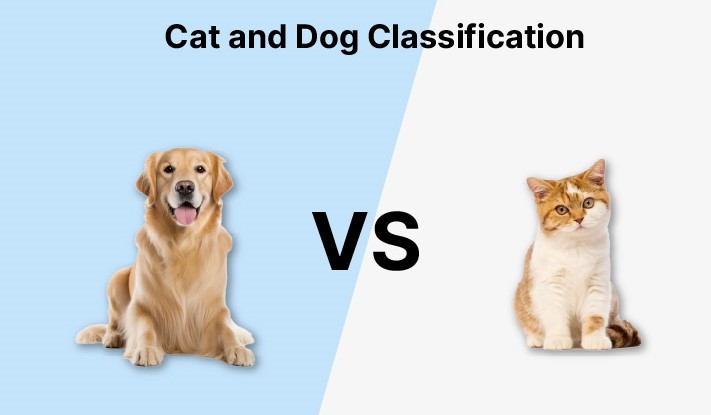

# **1. Load dan Preprocess Data**
Pada langkah ini, kita memuat dataset dari file CSV, melakukan reshaping data agar sesuai dengan format gambar, dan normalisasi nilai piksel agar berada dalam rentang 0 hingga 1.

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


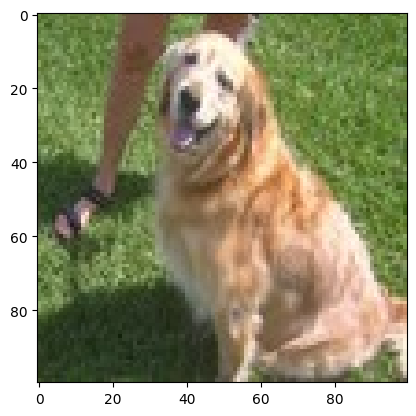

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Load data
X_train = np.loadtxt('/content/drive/MyDrive/tugas_csv/Image Clasification/input.csv', delimiter=',')
Y_train = np.loadtxt('/content/drive/MyDrive/tugas_csv/Image Clasification/labels.csv', delimiter=',')

X_test = np.loadtxt('/content/drive/MyDrive/tugas_csv/Image Clasification/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/content/drive/MyDrive/tugas_csv/Image Clasification/labels_test.csv', delimiter=',')

# Reshape data to match the expected input format for the model
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Normalize data by dividing by 255 to get values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Print the shapes of the datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

# Visualize a random training image
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx])
plt.show()


**Load data**: Membaca data dari file CSV.

**Reshape data**: Mengubah bentuk data menjadi format gambar dengan ukuran 100x100 piksel dan 3 channel warna (RGB).

**Normalize data**: Mengubah nilai piksel dari 0-255 menjadi 0-1 agar lebih mudah diproses oleh model.

**Visualize**: Menampilkan gambar acak dari dataset untuk memastikan data telah dimuat dengan benar.

# **2. Data Augmentation**
Data augmentation adalah teknik untuk memperbanyak jumlah data dengan membuat variasi baru dari gambar yang ada. Ini membantu model menjadi lebih robust dan tidak mudah overfit.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation to the training data
datagen.fit(X_train)



ImageDataGenerator: Alat untuk melakukan augmentasi data gambar dengan berbagai transformasi seperti rotasi, pergeseran, shear, zoom, dan flipping.
fit: Menerapkan augmentasi pada data training.

# **3. Transfer Learning dengan VGG16**
Menggunakan model yang sudah dilatih sebelumnya pada dataset besar (misalnya, ImageNet) sebagai basis untuk model kita. Ini memungkinkan model kita untuk memanfaatkan fitur yang sudah dipelajari dari dataset besar.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load VGG16 model pre-trained on ImageNet without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers in the base model to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Build the model by adding custom layers on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


**VGG16**: Model pretrained yang dilatih pada dataset besar seperti ImageNet.

**Freeze layers**: Mencegah pembaruan pada lapisan pretrained saat training.

**Build model**: Menambahkan lapisan custom di atas base model untuk tugas klasifikasi kita.

# **4. Compile Model**
Mengkompilasi model dengan loss function, optimizer, dan metrics yang akan digunakan untuk evaluasi performa model.

In [ ]:
# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy as the evaluation metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


**loss**: Binary crossentropy digunakan karena kita memiliki tugas klasifikasi biner (anjing atau kucing).

**optimizer**: Adam optimizer digunakan untuk mempercepat proses training.

**metrics**: Menggunakan akurasi sebagai metrik evaluasi untuk mengukur performa model.

# **5. Callbacks untuk Early Stopping dan Model Checkpoint**
Callbacks digunakan untuk menyimpan model terbaik selama training dan menghentikan training jika performa model tidak lagi membaik.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')


**EarlyStopping**: Menghentikan training jika tidak ada perbaikan pada validation loss setelah beberapa epoch tertentu.

**ModelCheckpoint**: Menyimpan model terbaik berdasarkan validation loss selama training.

# **6. Latih Model dengan Data Augmentation**
Melatih model menggunakan generator data augmentation.

In [ ]:
# Train the model
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/30
63/63 [==============================] - 297s 5s/step - loss: 0.6207 - accuracy: 0.6695 - val_loss: 0.3983 - val_accuracy: 0.8100
Epoch 2/30
63/63 [==============================] - 295s 5s/step - loss: 0.4747 - accuracy: 0.7695 - val_loss: 0.3806 - val_accuracy: 0.8275
Epoch 3/30
63/63 [==============================] - 295s 5s/step - loss: 0.4427 - accuracy: 0.7820 - val_loss: 0.4007 - val_accuracy: 0.8125
Epoch 4/30
63/63 [==============================] - 296s 5s/step - loss: 0.4495 - accuracy: 0.7900 - val_loss: 0.3636 - val_accuracy: 0.8350
Epoch 5/30
63/63 [==============================] - 296s 5s/step - loss: 0.4171 - accuracy: 0.8075 - val_loss: 0.3504 - val_accuracy: 0.8300
Epoch 6/30
63/63 [==============================] - 295s 5s/step - loss: 0.4277 - accuracy: 0.8055 - val_loss: 0.3617 - val_accuracy: 0.8425
Epoch 7/30
63/63 [==============================] - 254s 4s/step - loss: 0.4276 - accuracy: 0.7870 - val_loss: 0.3536 - val_accuracy: 0.8300
Epoch 8/30
63

**fit** : Melatih model menggunakan data augmentation yang dihasilkan oleh ImageDataGenerator.

**epochs** : Jumlah maksimum epoch untuk training.

**batch_size** : Ukuran batch untuk setiap iterasi training.

**validation_data** : Data yang digunakan untuk memvalidasi performa model selama training.

**callbacks** : Menggunakan early stopping dan model checkpoint untuk menyimpan model terbaik.

# **7. Evaluasi Model**
Evaluasi performa model pada data testing untuk mengukur akurasi.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


13/13 [==============================] - 42s 3s/step - loss: 0.2984 - accuracy: 0.8600
Test Accuracy: 86.00%


**evaluate** : Mengukur performa model pada data testing dan mengembalikan nilai loss dan akurasi.

**print**: Menampilkan akurasi model dalam persentase.

# **8. Prediksi dan Visualisasi**
Melakukan prediksi pada gambar uji acak dan menampilkan hasilnya untuk verifikasi visual.

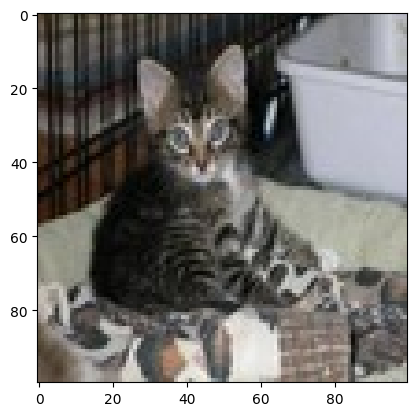

1/1 [==============================] - 0s 240ms/step
Our model says it is a: cat


In [ ]:
# Predict and visualize a random test image
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2])
plt.show()

# Predict the class
y_pred = model.predict(X_test[idx2].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

# Print prediction result
if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a:", pred)


**random.randint**: Memilih gambar acak dari dataset testing.

**plt.imshow**: Menampilkan gambar yang dipilih.

**predict**: Melakukan prediksi pada gambar yang dipilih.

**Convert probabilities to binary output**: Mengubah probabilitas prediksi menjadi kelas biner.

**Print**: Menampilkan hasil prediksi model (anjing atau kucing).